In [1]:
#meta 4/25/2021 LSHTC3 Vis Hierarchy
#Daniel's DAG_viz.ipynb for LSHTC3

#install notes: conda install errors out with conflicts
#pip install graphviz

#history
#4/30/2021 0-DATAVIS W/ GRAPHVIZ
#     Vis Hierarchy, Graph vs Digraph
#     sample from full ds and full from reduced train subset

#5/1/2021 DISPLAY GRAPHS INLINE        

In [2]:
import numpy as np
import pandas as pd
from graphviz import Graph
from graphviz import Digraph

from joblib import dump, load

# Visualization using the Graphviz Library
**Goal:** Visualize all (or some) of the DAG defining the LSHTC3 data.

Source: https://graphviz.readthedocs.io/en/stable/examples.html

## Part 1. Original Dataset
### 0. Load Data
Load LSHTC3 Hierarchy - all vertices and edges

In [3]:
with open("../input/mylshtc3train/hierarchyWikipediaMedium.txt", 'r') as edges:
    lines = []
    
    for line in edges.readlines():
        line = line.rstrip('\r\n')
        line = line.split(' ')
        lines.append(line)

print(lines[0:10])    
print ('Hierarchy size: ', len(lines))

[['2143406', '2156813'], ['2143406', '2322682'], ['2143406', '143406'], ['2143406', '2255744'], ['2143406', '2235965'], ['2156813', '2440809'], ['2156813', '2159645'], ['2156813', '2267844'], ['2156813', '2271677'], ['2156813', '2152343']]
Hierarchy size:  65333


### 1.  Vis
#### 1.1 Graph
Nodes around nodes

In [4]:
#shape: child? nodes around parent? nodes
g = Graph('G', filename='myGraphViz/gv_lshtc3_ds_graph_example', engine='sfdp')
g.attr(size='8,5')
for edge in lines[6000:6100]:
    g.edge(edge[0], edge[1])

#g.view()

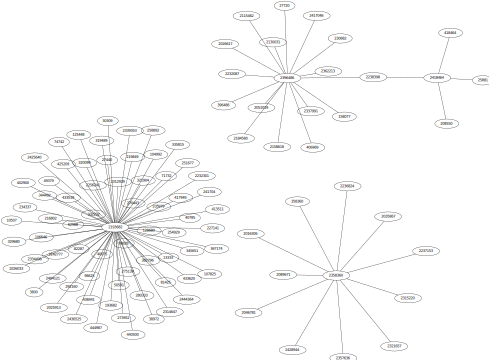

In [5]:
#Graph and Digraph objects have a _repr_svg_()-method 
#so they can be rendered and displayed directly inside a Jupyter notebook. 
#For an example, check the examples/graphviz-notebook.ipynb
g

### 2. Data EDA

In [6]:
#convert a list of strings to ints
#src https://www.kite.com/python/answers/how-to-convert-a-list-of-strings-to-ints-in-python
    
lines_int = []

for line in lines:
    #Maps each string to an int
    integer_map = map(int, line)
    #Converts mapped output to a list of ints
    integer_list = list(integer_map)
    lines_int.append(integer_list)

print(lines_int[:10])
print ('Hierarchy size: ', len(lines_int))

[[2143406, 2156813], [2143406, 2322682], [2143406, 143406], [2143406, 2255744], [2143406, 2235965], [2156813, 2440809], [2156813, 2159645], [2156813, 2267844], [2156813, 2271677], [2156813, 2152343]]
Hierarchy size:  65333


In [7]:
#flatten nodes, type int
nodes_flat = [line for sublist in lines_int for line in sublist]
nodes_flat
print('Transformed list preview: ', nodes_flat[:25])
print('Transformed list count: ', len(nodes_flat))

Transformed list preview:  [2143406, 2156813, 2143406, 2322682, 2143406, 143406, 2143406, 2255744, 2143406, 2235965, 2156813, 2440809, 2156813, 2159645, 2156813, 2267844, 2156813, 2271677, 2156813, 2152343, 2156813, 1008038, 2156813, 2310019, 2156813]
Transformed list count:  130666


In [8]:
nodes_unique, nodes_counts = np.unique(np.array(nodes_flat), return_counts = True)
nodes_unique, nodes_counts, nodes_unique.shape

#confirmed counts with 
#len(set(lines_flat))

(array([      1,      14,      19, ..., 2445633, 2445671, 2445705]),
 array([2, 1, 1, ..., 5, 3, 5]),
 (50312,))

In [9]:
from scipy import stats
stats.describe(nodes_counts)

DescribeResult(nobs=50312, minmax=(1, 764), mean=2.597114008586421, variance=39.8721850282055, skewness=47.70757019444714, kurtosis=4649.0845725832705)

## Part 2. Subset

### 0. Load Reduced Train Subset
with only 139 vertices (aka labels)

In [10]:
#load prepared pkl with less labels
df_sub = load("../input/mylshtc3train/lshtc3_wikipedia_med_df_train_tidy.pkl")
print(df_sub.shape)
df_sub.head()

(151800, 2)


,labels,text
0,130762,Alain Connes (born 1 April 1947) is a French m...
1,352578,Ayn Rand (born Alisa Zinov'yevna Rosenbaum; Fe...
2,395447,Ayn Rand (born Alisa Zinov'yevna Rosenbaum; Fe...
3,27512,Ayn Rand (born Alisa Zinov'yevna Rosenbaum; Fe...
4,390846,"Allan Dwan (April 3, 1885 – December 28, 1981)..."


In [11]:
#list of all labels in subset 
labels_train = df_sub['labels'].unique() #pandas.core.arrays.categorical.Categorical aka list of integers
print(len(labels_train)) 

139


In [12]:
#know that 10088 exists in both
10088 in nodes_unique, 10088 in labels_train

(True, True)

### 1. Data Prep

In [13]:
nodes_sub = []
for l in labels_train:
    #print (l)
    [nodes_sub.append(node) for node in nodes_unique if node == l]
    
print(nodes_sub[0:100])
    
print ('Nodes sub size: ', len(nodes_sub))


[130762, 352578, 395447, 27512, 390846, 14661, 106615, 303577, 333275, 195696, 196360, 308993, 93043, 169463, 43724, 276597, 125243, 218487, 85048, 347803, 23214, 335156, 321123, 269785, 302125, 104651, 260663, 256667, 354187, 289056, 199981, 377436, 156349, 284433, 175178, 258850, 59600, 304661, 88179, 167593, 65566, 38982, 29931, 297190, 118798, 286463, 10088, 221836, 106409, 10590, 443106, 283023, 142366, 195307, 82093, 37462, 13139, 195321, 437070, 272741, 357512, 173922, 78599, 275465, 157144, 283823, 340177, 387254, 231362, 429649, 117362, 344126, 276713, 335454, 354078, 156147, 228803, 427995, 243459, 242897, 10307, 229071, 47886, 229765, 257731, 135508, 219680, 417577, 305313, 237392, 337673, 114538, 47471, 48448, 118947, 288266, 126647, 239004, 115269, 114873]
Nodes sub size:  139


In [14]:
335156 in nodes_unique, 335156 in nodes_sub, 335156 in labels_train

(True, True, True)

In [15]:
#for readability
#hierarchy_sub = []
#for l in lines_int:
#    #print (l[0])
#    if (l[0] in nodes_sub) or (l[1] in nodes_sub):
#        hierarchy_sub.append(l)
    
#print(hierarchy_sub[0:100])
#print ('Hierarchy sub size: ', len(hierarchy_sub))

In [16]:
#same as above as ListComprehension
hierarchy_sub = []
[hierarchy_sub.append(l) for l in lines_int if (l[0] in nodes_sub) or (l[1] in nodes_sub)]
    
print(hierarchy_sub[0:100])
print ('Hierarchy sub size: ', len(hierarchy_sub))

[[1000195, 335156], [2067542, 82093], [2037462, 37462], [2297190, 297190], [2209192, 173922], [2419511, 130762], [2283023, 283023], [1000136, 195696], [1000136, 390846], [2125243, 125243], [2014661, 14661], [2196360, 196360], [2196360, 175178], [2027512, 27512], [1009057, 372441], [2320417, 126647], [2010307, 10307], [2307819, 307819], [2033830, 372441], [2078599, 78599], [2303577, 303577], [2230740, 51353], [2173227, 335156], [2283823, 175178], [2283823, 283823], [2010088, 10088], [2387854, 335156], [2042519, 228857], [2042519, 87256], [2123328, 206589], [2275465, 275465], [2359911, 131503], [2284433, 284433], [2337673, 337673], [2229071, 229071], [2184027, 184027], [2219680, 219680], [2048448, 48448], [2257731, 257731], [2074916, 47471], [2407717, 390846], [2377436, 377436], [2333275, 333275], [2118798, 118798], [2321123, 321123], [2177784, 177784], [2395447, 395447], [2335454, 335454], [2308993, 135508], [2308993, 308993], [2187944, 187944], [2347803, 390846], [2347803, 347803], [23

In [17]:
for edge in hierarchy_sub[:10]:
    print(edge)

[1000195, 335156]
[2067542, 82093]
[2037462, 37462]
[2297190, 297190]
[2209192, 173922]
[2419511, 130762]
[2283023, 283023]
[1000136, 195696]
[1000136, 390846]
[2125243, 125243]


### 2. Vis
#### 2.1 Graph
Nodes around nodes

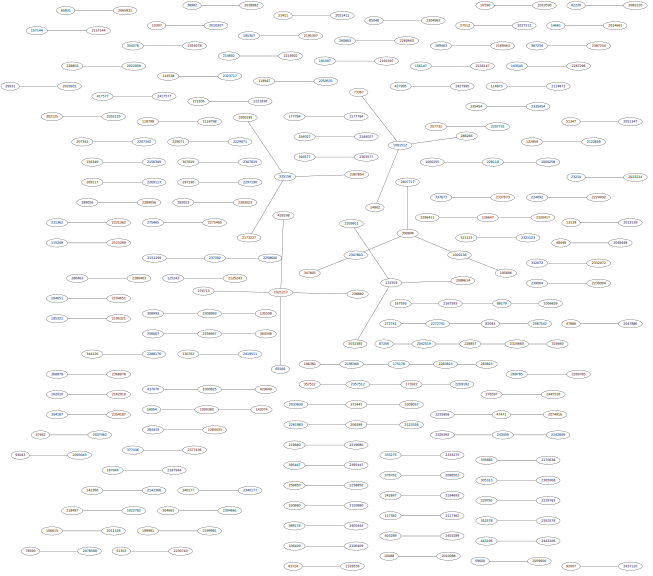

In [18]:
#shape: child nodes around parent nodes 
#$error with integers -> convert to string
g = Graph('G', filename='myGraphViz/gv_lshtc3_sub_graph', engine='sfdp')
g.attr(size='10,8')
for edge in hierarchy_sub:
    g.edge(str(edge[0]), str(edge[1]))
    
#view
g

#### 2.2 Digraph
tree-like, parent nodes -> child nodes

In [19]:
#shape: tree-like, parent nodes -> child nodes
g = Digraph('G', filename='myGraphViz/gv_lshtc3_subset_digraph', node_attr={'color': 'lightblue2', 'style': 'filled'})
g.attr(size='25,8')

for edge in hierarchy_sub:
    g.edge(str(edge[0]), str(edge[1]))

#view
g

In [20]:
mystop

NameError: name 'mystop' is not defined

## Xtra

### Display Graph Image
![Hierarchy of Subset] (../input/mylshtc3temp/process_gv.png)  
If above doesn't work. 

Note: Embedded image with code, after markup embedding didn't work.  
src https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o

In [ ]:
#$xtra embed image
from IPython.core.display import Image, display
display(Image('../input/mylshtc3temp/process_gv.png', width=600, unconfined=True))

In [ ]:
#$xtra - snippet: convert a list of strings to ints
#src https://www.kite.com/python/answers/how-to-convert-a-list-of-strings-to-ints-in-python

lines_int = []

for line in lines[:10]:
    #Maps each string to an int
    integer_map = map(int, line)
    #Converts mapped output to a list of ints
    integer_list = list(integer_map)
    lines_int.append(integer_list)

print(lines_int[:10])